In [11]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

model = load_model('C:\\Users\\wwwja\\OneDrive\\Desktop\\New folder\\Project\\LeafLens\\Model\\xception_model.keras')
labels= ['Aloevera', 'Amla', 'Amruthaballi', 'Arali', 'Arjun Leaf', 'Astma_weed', 'Badipala', 'Balloon_Vine', 'Bamboo', 'Beans', 'Betel', 'Bhrami', 'Bringaraja', 'Caricature', 'Castor', 'Catharanthus', 'Chakte', 'Chilly', 'Citron lime (herelikai)', 'Coffee', 'Common rue(naagdalli)', 'Coriender', 'Curry', 'Doddpathre', 'Drumstick', 'Ekka', 'Eucalyptus', 'Ganigale', 'Ganike', 'Gasagase', 'Ginger', 'Globe Amarnath', 'Guava', 'Henna', 'Hibiscus', 'Honge', 'Insulin', 'Jackfruit', 'Jasmine', 'Kambajala', 'Kasambruga', 'Kohlrabi', 'Lantana', 'Lemon', 'Lemongrass', 'Malabar_Nut', 'Malabar_Spinach', 'Mango', 'Marigold', 'Marsh Pennywort Leaf', 'Mint', 'Neem', 'Nelavembu', 'Nerale', 'Nooni', 'Onion', 'Padri', 'Palak(Spinach)', 'Papaya', 'Parijatha', 'Pea', 'Pepper', 'Pomoegranate', 'Pumpkin', 'Raddish', 'Rose', 'Rubble Leaf', 'Sampige', 'Sapota', 'Seethaashoka', 'Seethapala', 'Spinach1', 'Tamarind', 'Taro', 'Tecoma', 'Thumbe', 'Tomato', 'Tulsi', 'Turmeric', 'ashoka', 'camphor', 'kamakasturi', 'kepala']

In [12]:
def get_plant_info(plant_name, file_path='C:\\Users\\wwwja\\OneDrive\\Desktop\\New folder\\Project\\LeafLens\\Information\\Information\\plant_information.txt'):
    with open(file_path, 'r') as file:
        lines = file.read().splitlines()

    plant_info = []
    is_plant = False

    for line in lines:
        if line.strip() == plant_name:
            is_plant = True
            plant_info.append(line)
        elif is_plant:
            if '~' in line:
                break
            plant_info.append(line)

    return '\n'.join(plant_info) if plant_info else f'No information found for {plant_name}.'


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


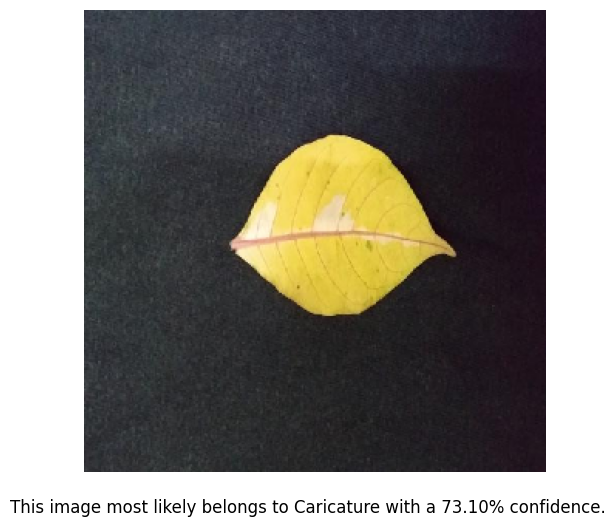

							Plant Information:

Caricature
Classification: Tree

Botanical Information
- Scientific Name: Carica papaya
- Family: Caricaceae

Physical Characteristics
- Caricature, or Papaya, is a small tree that can grow up to 10 feet tall, with large, palmate leaves and a smooth, green trunk.
- The plant produces large, oval fruits that ripen to orange or yellow, containing numerous black seeds.

Health Benefits
- Papaya is rich in Vitamin C, Vitamin A, and digestive enzymes like papain, making it great for digestive health and immune support.
- It is also known for its anti-inflammatory and antioxidant properties, promoting skin health and reducing the risk of chronic diseases.

Common Uses
- Papaya is commonly eaten fresh, used in smoothies, salads, or desserts.
- The fruit is also used in traditional medicine for its digestive benefits and skin treatments.

Cultivation Tips
- Papaya grows best in well-drained, sandy loam soil in a sunny location.
- It requires a warm, tropical climate 

In [13]:

img = tf.keras.preprocessing.image.load_img(
    'C:\\Users\\wwwja\\OneDrive\\Desktop\\New folder\\Project\\LeafLens\\Known Data\\150.jpg', target_size=(299, 299)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.sigmoid(predictions[0])
predicted_label = labels[np.argmax(score)]
confidence = 100 * np.max(score)

plant_info = get_plant_info(predicted_label)

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(img)
ax.axis('off')

plt.figtext(0.5, 0.05, f"This image most likely belongs to {predicted_label} with a {confidence:.2f}% confidence.", ha="center", va="center", fontsize=12)

plt.show()

print(f"\t\t\t\t\t\t\tPlant Information:\n\n{plant_info}")


## Model is  working fine on the trained Data

## Using new/Unknown Images for Testing

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


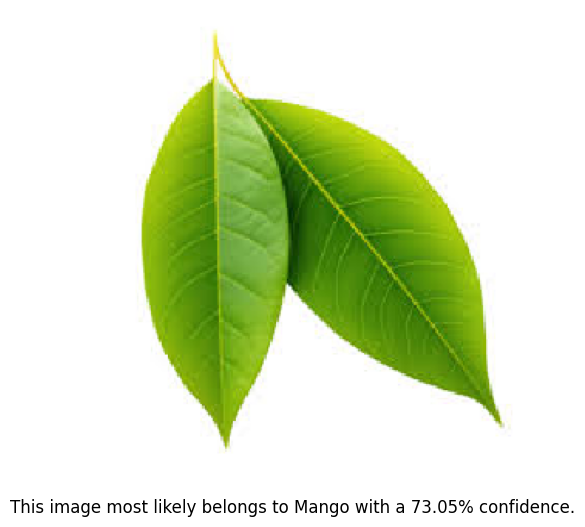

							Plant Information:

Mango
Classification: Tree

Botanical Information
- Scientific Name: Mangifera indica
- Family: Anacardiaceae

Physical Characteristics
- Mango is a large, evergreen tree with thick, dark green leaves and yellow to red flowers.
- The fruit is oval, with a smooth, green to yellow skin and a fibrous, juicy pulp.

Health Benefits
- Mangoes are rich in vitamins A and C, fiber, and antioxidants, supporting eye health, skin health, and immune function.
- The fruit also aids in digestion and helps maintain healthy cholesterol levels.

Common Uses
- Mangoes are eaten fresh, used in smoothies, juices, salads, and desserts.
- The fruit is also used to make pickles, jams, and chutneys, and the leaves are sometimes used in religious rituals.

Cultivation Tips
- Mango trees prefer well-drained, sandy soil and full sunlight.
- The trees thrive in warm, tropical climates and require minimal watering once established.

Precautions
- Mangoes may cause an allergic reaction in 

In [15]:
import numpy as np

img = tf.keras.preprocessing.image.load_img(
    'C:\\Users\\wwwja\\OneDrive\\Desktop\\New folder\\Project\\LeafLens\\Testing\\New Images\\mango.jpg', target_size=(299, 299)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.sigmoid(predictions[0])
predicted_label = labels[np.argmax(score)]
confidence = 100 * np.max(score)

plant_info = get_plant_info(predicted_label)

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(img)
ax.axis('off')

plt.figtext(0.5, 0.05, f"This image most likely belongs to {predicted_label} with a {confidence:.2f}% confidence.", ha="center", va="center", fontsize=12)

plt.show()

print(f"\t\t\t\t\t\t\tPlant Information:\n\n{plant_info}")